<a href="https://colab.research.google.com/github/ptavares96/Analise_de_dados_Airbnb/blob/main/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - São Francisco

O [Airbnb](https://www.airbnb.com.br/) é uma plataforma de aluguéis e hospedagem que está online desde 2008. A plataforma, que está presente em mais de 190 países, permite que os usuários saiam do usual aluguel de hotéis e procurem alternativas de casas e apartamentos. Assim, de acordo com o tempo de viagem, localidade ou quantidade de pessoas poderá ser mais barato que o aluguel de quartos de hotéis.

Com o objetivo de estudar a extração de informação a partir de dados de empresas, este projeto mostra uma análise dos dados do Aribnb para a cidade de São Francisco, California. O projeto faz parte de uma das atividades do Curso Data Science na Prática.

<center><img alt="Analisando Airbnb" width="30%" src="https://airbnblover.com/wp-content/uploads/2017/02/airbnb-refugees-300x158.png"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de São Francisco, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [2]:
# importando pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files 

Os dados foram obtidos pelo portal [Inside Airbnb](http://insideairbnb.com/get-the-data/). No portal contém alguns datasets com informações de várias cidades. Esses dados são disponibilizados pela própria empresa Airbnb.

In [3]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/united-states/ca/san-francisco/2021-12-04/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* id : identificação única para o anúncio
* name : nome do anúncio
* host_id : identificador único para o proprietário do imóvel
* host_name : nome do proprietário
* neighbourhood_group :município ao qual o imóvel pertence, geolocalizado pelas coordenadas de latitude e longitude
* neighbourhood : bairro da propriedade
* latitude : coordenada geográfica de latitude da propriedade
* longitude : coordenada geográfica de longitude da propriedade
* room_type : tipo de quarto oferecido para locação
* price : preço da diária do aluguel
* minimum_nights : quantidade mínima de noites para alugar o imóvel
* number_of_reviews : quantidade de avaliações que o imóvel tem
* last_review : data da última avaliação
* reviews_per_month : quantidade de avaliações por mês
* calculated_host_listings_count : quantidade de imóveis do mesmo proprietário na mesma cidade/região
* availability_365 : número de dias disponíveis para locação nos próximos 365 dias
* number_of_reviews_ltm : quantidade de avaliações nos últimos 12 meses
* license : número de registro do imóvel

Antes de iniciar a  análise, vamos verificar se está tudo certo com a importação dos dados, observando as 5 primeiras entradas.

In [3]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,NaN,Western Addition,37.77028,-122.43317,Entire home/apt,161,2,314,2021-11-19,3.60,1,126,43,City Registration Pending
1,5858,Creative Sanctuary,8904,Philip And Tania,NaN,Bernal Heights,37.74474,-122.42089,Entire home/apt,235,30,111,2015-08-28,0.76,1,365,0,NaN
2,7918,A Friendly Room - UCSF/USF - San Francisco,21994,Aaron,NaN,Haight Ashbury,37.76555,-122.45213,Private room,56,32,19,2020-03-06,0.17,9,365,0,NaN
3,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,21994,Aaron,NaN,Haight Ashbury,37.76555,-122.45213,Private room,56,32,8,2017-08-12,0.10,9,365,0,NaN
4,8339,Historic Alamo Square Victorian,24215,Rosy,NaN,Western Addition,37.77564,-122.43642,Entire home/apt,895,7,28,2019-06-28,0.19,2,364,0,STR-0000264


In [4]:
# descrição estatística
df.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,6.413000e+03,6.413000e+03,0.0,6413.000000,6413.000000,6413.000000,6413.000000,6413.000000,5077.000000,6413.000000,6413.000000,6413.000000
mean,2.783746e+07,8.524930e+07,NaN,37.768517,-122.429795,228.636520,24.007797,44.483861,2.055937,14.352253,166.752534,6.895057
std,1.681251e+07,1.125628e+08,NaN,0.022844,0.026904,671.915606,49.746920,85.496409,5.745197,32.645732,133.528567,16.514490
min,9.580000e+02,1.169000e+03,NaN,37.708370,-122.512460,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,1.331858e+07,4.440278e+06,NaN,37.753230,-122.442490,93.000000,2.000000,1.000000,0.210000,1.000000,33.000000,0.000000
50%,2.919296e+07,2.712355e+07,NaN,37.772026,-122.423260,145.000000,30.000000,7.000000,0.670000,2.000000,153.000000,1.000000
75%,4.268582e+07,1.220748e+08,NaN,37.787430,-122.410580,232.000000,30.000000,45.000000,2.130000,9.000000,306.000000,5.000000
max,5.365842e+07,4.344078e+08,NaN,37.809540,-122.368230,25000.000000,1125.000000,877.000000,162.000000,154.000000,365.000000,435.000000


 A partir de uma breve descrição estatística dos dados é possível observar:

Que a variável **price**, correspondente ao o valor em dólar/noite do aluguel, tem a média de aproximadamente \$228,00 e com 75% dos valores abaixo de \$232,00. Porém o preço máximo é \$25000,00 e o desvio padrão de 671, 91. É necéssario tomar cuidado descrição estatística dessa variável pois pode conter **outlier**.

Outro ponto a ser observado é a variável **minimum_nights**. A média de noites mímimas alugadas é aproximadamente 24 noites, com 75% dos valores abaixo de 30 noites. Mas o valor máximo de noites já alugados foram de 1125. Um valor fora do comum para um tempo de aluguel pelo Airbnb. Assim o valor chama a atenção por ser discrepante, podendo ser também **outlier**. 

### **Observando os atributos (variáveis) e quantas entradas o nosso conjunto de dados possui e os tipos das variáveis**`

In [5]:
# identificar o volume de dados do DataFrame
print(f'No dataset há {df.shape[0]} entradas e {df.shape[1]} atributos (variáveis)')
# tipos de variáveis
print('\nOs tipos de varíaveis do dataset são:')
df.dtypes

No dataset há 6413 entradas e 18 atributos (variáveis)

Os tipos de varíaveis do dataset são:


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Porcentagem de valores ausentes no *dataset***

In [6]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
print('As variáveis que possuem mais valores ausentes, em porcentagem (%), são:\n')
(df.isnull().sum()/df.shape[0]*100).sort_values(ascending = False)

As variáveis que possuem mais valores ausentes, em porcentagem (%), são:



neighbourhood_group               100.000000
license                            43.427413
reviews_per_month                  20.832684
last_review                        20.832684
host_name                           0.218307
minimum_nights                      0.000000
number_of_reviews_ltm               0.000000
availability_365                    0.000000
calculated_host_listings_count      0.000000
number_of_reviews                   0.000000
id                                  0.000000
name                                0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_id                             0.000000
price                               0.000000
dtype: float64

Observa-se que não há entradas na variável **neighbourhood_group**. E as outras variáveis que possuem valores ausentes não serão relevantes para esta análise. 

### **Observando a distribuição das variáveis** 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

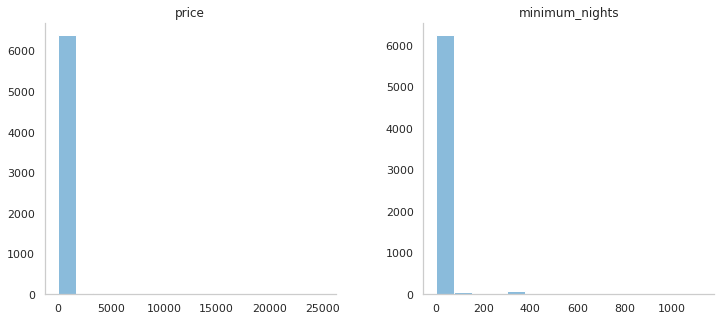

In [7]:
sns.set_theme(style="whitegrid", palette="Blues_d")
# plotar o histograma das variáveis numéricas
df[['price', 'minimum_nights']].hist(bins=15, figsize = (12,5), grid=False);
sns.despine()
plt.savefig('hist.png', dpi=100, bbox_inches='tight')
files.download('hist.png') 

Com a distribuição das variáveis observa-se que há uma má distribuição nos valores das noites mínimas, preços e na variáveis que correspondem a avaliações (reviews). Essas más distribuições são causadas pela presença de valores outliers. Para que seja observado adequadamente esses dados é necessário que haja uma limpeza desses dados.

### Realizando limpeza dos outiliers

In [8]:
#identificando os outliers para a variavel price
q1_price = df.price.quantile(0.25)
q3_price = df.price.quantile(0.75)
IQR_price = q3_price - q1_price 
print('IQR da variavel price:', IQR_price)

#definindo limites
sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price

print('Limite superior de price:', sup_price)
print('Limite inferior de price:', inf_price)

IQR da variavel price: 139.0
Limite superior de price: 440.5
Limite inferior de price: -115.5


In [9]:
print("O dataset possui {} entradas".format(df.shape[0]))
print("{} entradas com preços acima de $440,50".format(len(df[df.price > 440.5])))
print("As entradas com preços acima de $440,50 representam {:.2f}% do dataset".format((len(df[df.price > 440.5])/df.shape[0])*100))

O dataset possui 6413 entradas
497 entradas com preços acima de $440,50
As entradas com preços acima de $440,50 representam 7.75% do dataset


In [10]:
# identificando os outliers para a variável minimum_nights
q1_minimum_nights = df.minimum_nights.quantile(.25)
q3_minimum_nights = df.minimum_nights.quantile(.75)
IQR_minimum_nights = q3_minimum_nights - q1_minimum_nights
print('IQR da variável minimum_nights: ', IQR_minimum_nights)

# definindo os limites                                       
sup_minimum_nights = q3_minimum_nights + 1.5 * IQR_minimum_nights
inf_minimum_nights = q1_minimum_nights - 1.5 * IQR_minimum_nights

print('Limite superior de minimum_nights: ', sup_minimum_nights)
print('Limite inferior de minimum_nights: ', inf_minimum_nights)

IQR da variável minimum_nights:  28.0
Limite superior de minimum_nights:  72.0
Limite inferior de minimum_nights:  -40.0


In [11]:
print("O dataset possui {} entradas".format(df.shape[0]))
print("{} Entradas acima com noites míminimas acima de 72".format(len(df[df.minimum_nights > 72.0])))
print("As entradas com noites míminimas acima de 72 representam {:.2f}% do dataset".format((len(df[df.minimum_nights > 72.0]) / df.shape[0])*100))

O dataset possui 6413 entradas
183 Entradas acima com noites míminimas acima de 72
As entradas com noites míminimas acima de 72 representam 2.85% do dataset


In [4]:
# adicionando um segundo ponto de retorno
df_clean = df.copy()

# excluindo ouliers das variáveis 'price' e 'minimum_nights'
df_clean.drop(df_clean[df_clean.price > 440.5].index, axis = 0, inplace = True)
df_clean.drop(df_clean[df_clean.price == 0].index, axis = 0, inplace = True)
df_clean.drop(df_clean[df_clean.minimum_nights > 72].index, axis = 0, inplace = True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

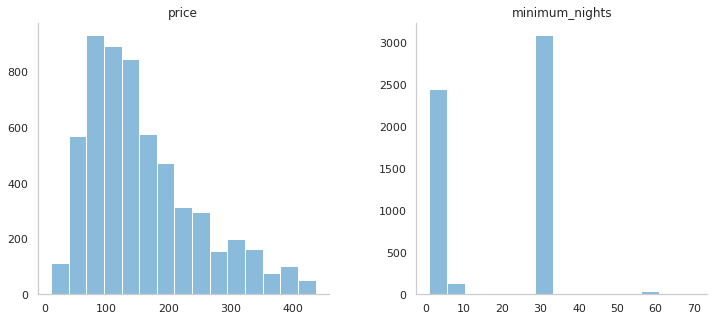

In [13]:
# plotar o histograma das variáveis numéricas
df_clean[['price', 'minimum_nights']].hist(bins=15, figsize = (12,5), grid=False);
sns.despine()
plt.savefig('hist_clean.png', dpi=100, bbox_inches='tight')
files.download('hist_clean.png') 

### **Média dos preços de aluguel**

In [14]:
# ver a média da coluna "price"
print(f"Média de preços de aluguel para a cidade do São Francisco é de ${df_clean.price.mean():.2f}")

Média de preços de aluguel para a cidade do São Francisco é de $157.74


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

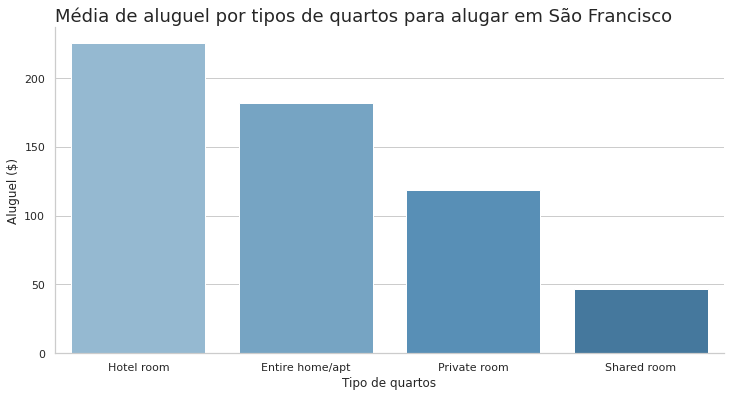

In [25]:
price_types_room = round(df_clean.groupby('room_type').price.mean(), 2).sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(12,6))
ax = sns.barplot(x=price_types_room.index, y=price_types_room.values)

ax.set_title('Média de aluguel por tipos de quartos para alugar em São Francisco', loc='left', fontsize=18)
ax.set_xlabel('Tipo de quartos', fontsize = 12)
ax.set_ylabel('Aluguel ($)', fontsize = 12)
sns.despine()
plt.savefig('media.png', dpi=100, bbox_inches='tight')
files.download('media.png') 

### **Correlação existente entre as variáveis**

In [16]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].corr()
# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
price,1.000000,-0.193618,-0.056159,-0.008627,-0.029255,-0.052337,-0.010772
minimum_nights,-0.193618,1.000000,-0.370301,-0.239936,0.150831,0.253411,-0.381331
number_of_reviews,-0.056159,-0.370301,1.000000,0.250361,-0.170129,-0.034272,0.549287
reviews_per_month,-0.008627,-0.239936,0.250361,1.000000,-0.089303,0.000317,0.561649
calculated_host_listings_count,-0.029255,0.150831,-0.170129,-0.089303,1.000000,0.091109,-0.141078
availability_365,-0.052337,0.253411,-0.034272,0.000317,0.091109,1.000000,-0.026362
number_of_reviews_ltm,-0.010772,-0.381331,0.549287,0.561649,-0.141078,-0.026362,1.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

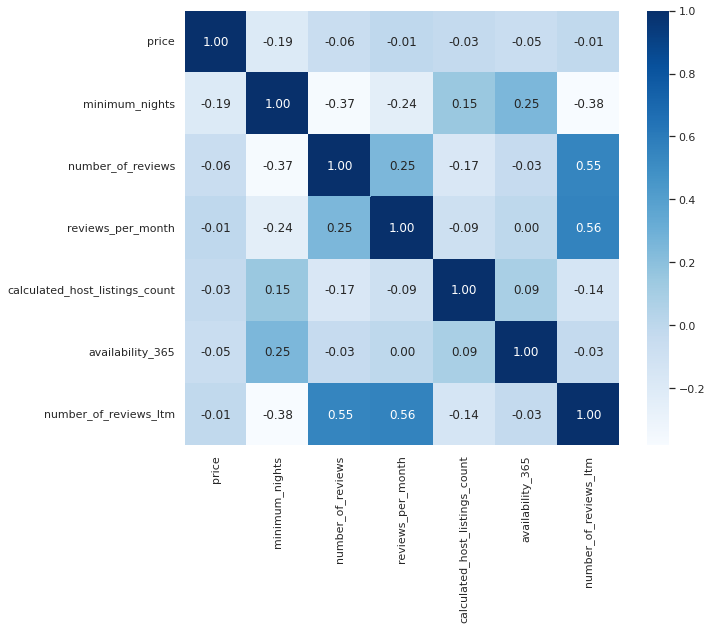

In [17]:
# plotar um heatmap a partir das correlações
plt.figure(figsize=(10,8))
sns.heatmap(corr, fmt='.2f', square=True,annot=True, cmap = "Blues");
plt.savefig('corr.png', dpi=100, bbox_inches='tight')
files.download('corr.png') 

Observando a matriz de correlação não se encontra correlações fortes entre as variáveis. 

### **Tipos de imóveis alugados pelo Airbnb em São Francisco**

In [18]:
# mostrar a quantidade de cada tipo de imóvel disponível
print("Quantidade dos tipos de quartos alugados em São Francisco:\n")
print(df_clean.room_type.value_counts());

Quantidade dos tipos de quartos alugados em São Francisco:

Entire home/apt    3629
Private room       1937
Shared room         131
Hotel room           46
Name: room_type, dtype: int64


In [19]:
# mostrar a porcentagem de cada tipo de imóvel disponível
print("Quantidade, em porcentagem (%) dos tipos de quartos alugados em São Francisco:\n")
df_clean.room_type.value_counts()/df.shape[0]*100

Quantidade, em porcentagem (%) dos tipos de quartos alugados em São Francisco:



Entire home/apt    56.588180
Private room       30.204273
Shared room         2.042726
Hotel room          0.717293
Name: room_type, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

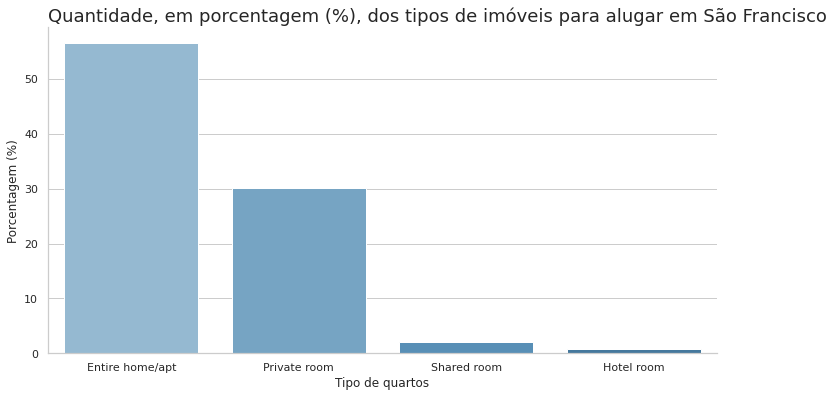

In [26]:
types_room = df_clean.room_type.value_counts()/df.shape[0]*100

fig, ax = plt.subplots(figsize=(12,6))
ax = sns.barplot(x=types_room.index, y=types_room.values)

ax.set_title('Quantidade, em porcentagem (%), dos tipos de imóveis para alugar em São Francisco', loc='left', fontsize=18)
ax.set_xlabel('Tipo de quartos', fontsize = 12)
ax.set_ylabel('Porcentagem (%)', fontsize = 12)
sns.despine()
plt.savefig('tipos.png', dpi=100, bbox_inches='tight')
files.download('tipos.png')

Observa-se que há um preferência de algueis casas ou apartamentos completos. 

### **Localidades alugadas pelo Airbnb na cidade São Francisco**





In [21]:
# ver preços por bairros, na média
print("Média de preços, em dólar ($), de aluguéis no airbnb por bairros de São Francisco:\n")
print(df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False))

Média de preços, em dólar ($), de aluguéis no airbnb por bairros de São Francisco:

neighbourhood
Presidio                 221.857143
Golden Gate Park         196.750000
Twin Peaks               196.119048
Castro/Upper Market      187.975510
Potrero Hill             187.922481
Glen Park                181.880000
Marina                   181.335526
Chinatown                179.072727
South of Market          174.714612
Noe Valley               174.533981
Russian Hill             173.852713
Presidio Heights         173.434783
Financial District       170.915493
Diamond Heights          168.900000
North Beach              166.737500
Bernal Heights           163.534799
Mission                  163.217647
Pacific Heights          162.822034
Nob Hill                 162.333333
Western Addition         161.024938
Outer Richmond           159.366197
West of Twin Peaks       157.537500
Inner Richmond           154.759494
Parkside                 154.559633
Haight Ashbury           149.498182
Do

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

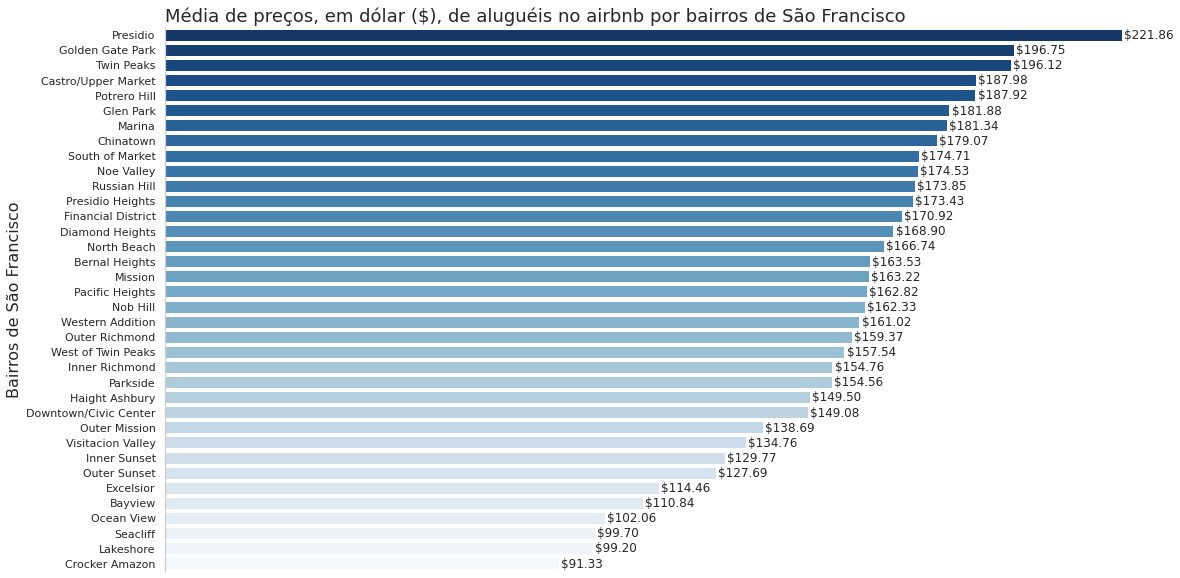

In [27]:
price_nei = df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)

palette = sns.color_palette("Blues",n_colors=36)
palette.reverse() 

fig, ax = plt.subplots(figsize=(18,10))
ax = sns.barplot(y=price_nei.index, x=price_nei.values, orient='h', palette = palette)
ax.grid(False)
ax.set(xticklabels=[])



for i in ax.patches:
    ax.text(i.get_width()+0.5, i.get_y()+0.65,
            str(f"${i.get_width():.2f}"),
            fontsize=12)

ax.set_title('Média de preços, em dólar ($), de aluguéis no airbnb por bairros de São Francisco', loc='left', fontsize=18)
ax.set_ylabel('Bairros de São Francisco', fontsize = 16)
sns.despine(bottom=True)
plt.savefig('media_bairros.png', dpi=100, bbox_inches='tight')
files.download('media_bairros.png')

O bairo Financial District em São Francisco é o que possui uma média de aluguéis mais caros.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

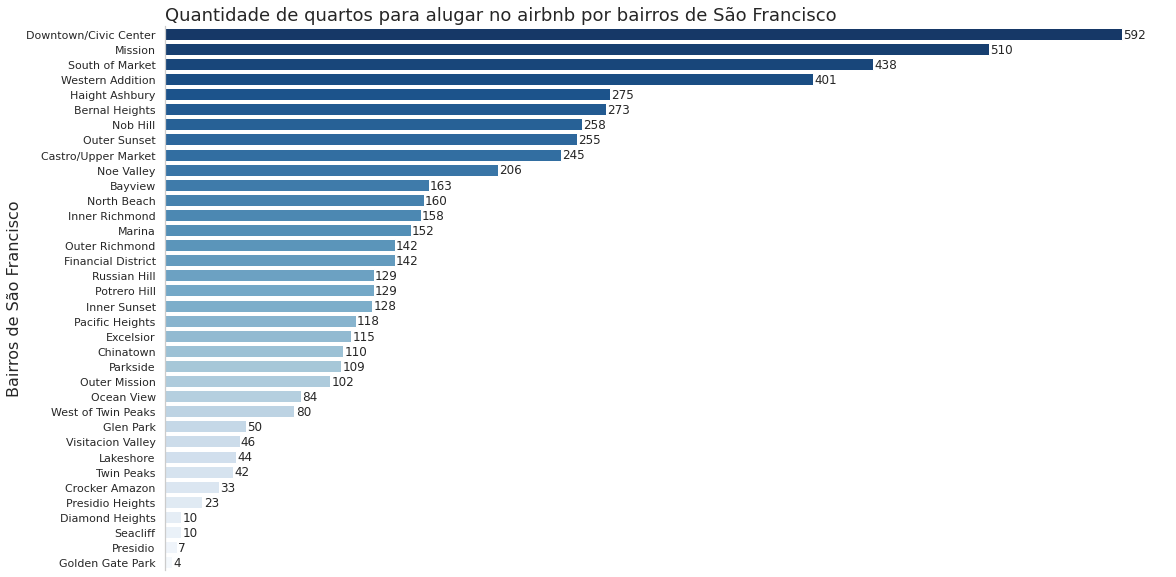

In [24]:
nei = df_clean.neighbourhood.value_counts().sort_values(ascending=False)

palette = sns.color_palette("Blues",n_colors=36)
palette.reverse() 

fig, ax = plt.subplots(figsize=(18,10))
ax = sns.barplot(y=nei.index, x=nei.values, orient='h', palette = palette)
ax.grid(False)
ax.set(xticklabels=[])

for i in ax.patches:
    ax.text(i.get_width()+0.8, i.get_y()+0.65,
            str(round((i.get_width()))),
            fontsize=12)

ax.set_title('Quantidade de quartos para alugar no airbnb por bairros de São Francisco', loc='left', fontsize=18)
ax.set_ylabel('Bairros de São Francisco', fontsize = 16)
sns.despine(bottom = True)
plt.savefig('quantidade_bairros.png', dpi=100, bbox_inches='tight')
files.download('quantidade_bairros.png')

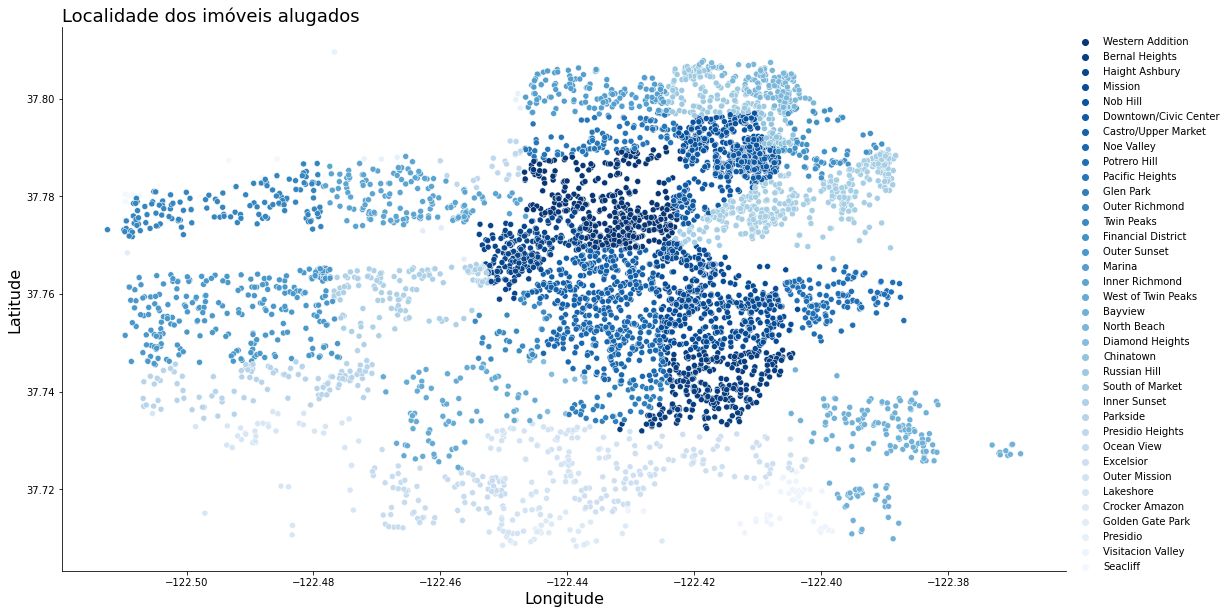

In [23]:
# plotar os imóveis pela latitude-longitude

fig, ax = plt.subplots(figsize=(18,10))

palette = sns.color_palette("Blues",n_colors=36)
palette.reverse()

ax = sns.scatterplot(data=df_clean, x='longitude', y='latitude', hue='neighbourhood', legend=True, palette = palette)
ax.set_title('Localidade dos imóveis alugados', loc='left', fontsize=18)
ax.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), ncol=1)
ax.set_xlabel('Longitude', fontsize = 16)
ax.set_ylabel('Latitude', fontsize = 16)
ax.grid(False)
ax.legend(frameon=False, bbox_to_anchor=(1, 1))
sns.despine()

plt.show()

### **Média do mínimo de noites para aluguel**

In [24]:
# ver a média da coluna `minimum_nights``
print("A média mínimas de noites alugadas é {}".format(round(df_clean.minimum_nights.mean(),2)))

A média mínimas de noites alugadas é 17.84


Em média um imóvel está para alugar a em São Francisco para no mínimo de **18 noites**.

## Conclusões


A análise de dados foi realizada com os dados do Airbnb para a cidade de São Francisco, Califórnia. Observando os dados, é possível realizar alguns destaques.

A variável neighbourhood_group não possui entradas, esta variável indica uma separação em zonas dos bairros de uma região metropolitana.

Foi necessário realizar uma limpeza de outliers nas variáveis price e minimum_nights. É interessante realizar essa limpeza pois são variáveis que podem ser consideradas importantes para uma escolha de determinado lugar. Após a limpeza é encontrado que a  média de valores, em dólar, para aluguel na cidade de São Francisco é de $157,54. Os aluguéis mais caros correspondem aos quartos de hotéis em São Francisco. De acordo com os dados, é mais barato alugar quartos compartilhados na cidade. 

O tipo de imóvel mais disponível para aluguel pelo Airbnb são casas ou apartamentos completos, correspondendo a 56,6% dos imóveis. Quartos de hotéis são os que têm menos disponibilidade, que corresponde a 0,7% dos imóveis. 

A região de Downtown/Civic Center possui 592 imóveis disponíveis para aluguel, sendo a região com o maior número de lugares para alugar. A região do Golden Gate Park é onde há menos imóveis disponíveis com apenas 4 imóveis para alugar. A região mais cara para alugar é Presidio, lá é localizado um parque e possui uma vista para a Golden Gate Bridge. 
